In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
import nltk
import string
from string import digits
nltk.download('stopwords')
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stosc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load datas

In [27]:
# Load stop words from nltk.
nltk_stopwords = set(nltk.corpus.stopwords.words("english")) 

# Load stop words from sklearn.
sklearn_stopwords = set(ENGLISH_STOP_WORDS)

# Load list of non-significative words.
useless = open("C:\\Users\\stosc\\Documents\\ESME\\Ingé2_2019-2020\\S2\\UE1\\Datatools\\Projet\\useless_word.txt", "r")
useless_words = useless.readlines()
for n in range(len(useless_words)):
    useless_words[n] = useless_words[n].rstrip('\n')
    
# Union on all 3 lists "stop_words".
STOP_WORDS = nltk_stopwords.union(sklearn_stopwords)
#STOP_WORDS = nltk_stopwords.union(sklearn_stopwords).union(useless_words)

#print(STOP_WORDS)

In [28]:
# Load data that contains series storylines.
df_storylines = pd.read_csv("C:\\Users\\stosc\\Documents\\ESME\\Ingé2_2019-2020\\S2\\UE1\\DataTools\\Projet\series_storylines.csv",
                      header=0, index_col=0)

df_storylines.describe

<bound method NDFrame.describe of                                              Storyline
1        David Attenborough returns in this breatht...
2        Each 50 minute episode features a global o...
3        This is the story of "E" Easy Company, 506...
4        When chemistry teacher Walter White is dia...
5        In April 1986, a huge explosion erupted at...
..                                                 ...
96       Nathaniel Fisher, his wife Ruth, and their...
97       From the earliest times, the humanity know...
98       The curious, adventure-seeking, fourth gra...
99       At Grace Field House, life couldn't be bet...
100      This is an animated sitcom about the antic...

[100 rows x 1 columns]>

# Clean datas

In [30]:
# Convert all text to lowercase.
df_storylines["Storyline"] = df_storylines["Storyline"].str.lower()

In [31]:
def remove_punctuation(story):
    
    """
    
    Remove the puncutation on a word. For exemple "good." : remove the dot from good.
    
    :param story: the dataframe that contains the storyline text.
    :type story: pandas dataframe.
    :return: storyline without the punctuation on the words.
    :rtype: string.
    
    """
    rem_punct = str.maketrans("","", string.punctuation)
    result = story.translate(rem_punct)
    
    return result

In [32]:
def remove_digits(story):
    
    """
    
    Remove the puncutation on a word. For exemple "good." : remove the dot from good.
    
    :param story: the dataframe that contains the storyline text.
    :type story: pandas dataframe.
    :return: each storyline without digits.
    :rtype: string.
    
    """
    
    remove_digits = str.maketrans("", "", digits)
    result = story.translate(remove_digits)
    
    return result

In [33]:
df_storylines["Storyline"] = df_storylines["Storyline"].apply(remove_punctuation)
df_storylines["Storyline"] = df_storylines["Storyline"].apply(remove_digits)

df_storylines["Storyline"]

1          david attenborough returns in this breatht...
2          each  minute episode features a global ove...
3          this is the story of e easy company th reg...
4          when chemistry teacher walter white is dia...
5          in april  a huge explosion erupted at the ...
                             ...                        
96         nathaniel fisher his wife ruth and their c...
97         from the earliest times the humanity knows...
98         the curious adventureseeking fourth grade ...
99         at grace field house life couldnt be bette...
100        this is an animated sitcom about the antic...
Name: Storyline, Length: 100, dtype: object

In [35]:
# Create dataframe with top 10 series.

df_top_ten = pd.DataFrame(df_storylines.iloc[0:10,0])
df_top_ten

,Storyline
1,david attenborough returns in this breatht...
2,each minute episode features a global ove...
3,this is the story of e easy company th reg...
4,when chemistry teacher walter white is dia...
5,in april a huge explosion erupted at the ...
6,set in baltimore this show centers around ...
7,nearly a generation after the acclaimed bl...
8,documentary series focusing on the breadth...
9,join the heroic quest for knowledge as we ...
10,in the mythical continent of westeros seve...


# Analysis

CountVectorizer

First analysis : find words that have high fequency amongs storyline from all first 100 series of the imdb classement.

In [10]:
cv = CountVectorizer(stop_words = STOP_WORDS, ngram_range=(1,1), max_features=2000)

In [12]:
# Apply CV on train data

cv.fit(df_storylines["Storyline"])

cv_transform = cv.transform(df_storylines["Storyline"])

new_df_storylines = pd.DataFrame(cv_transform.toarray(), columns=cv.get_feature_names())
  


In [17]:
word_frequency = new_df_storylines.sum(axis=0).sort_values(ascending=False)
word_frequency

life          35
series        32
world         23
war           22
family        21
              ..
indulge        1
surprising     1
surprises      1
supreme        1
germany        1
Length: 2000, dtype: int64

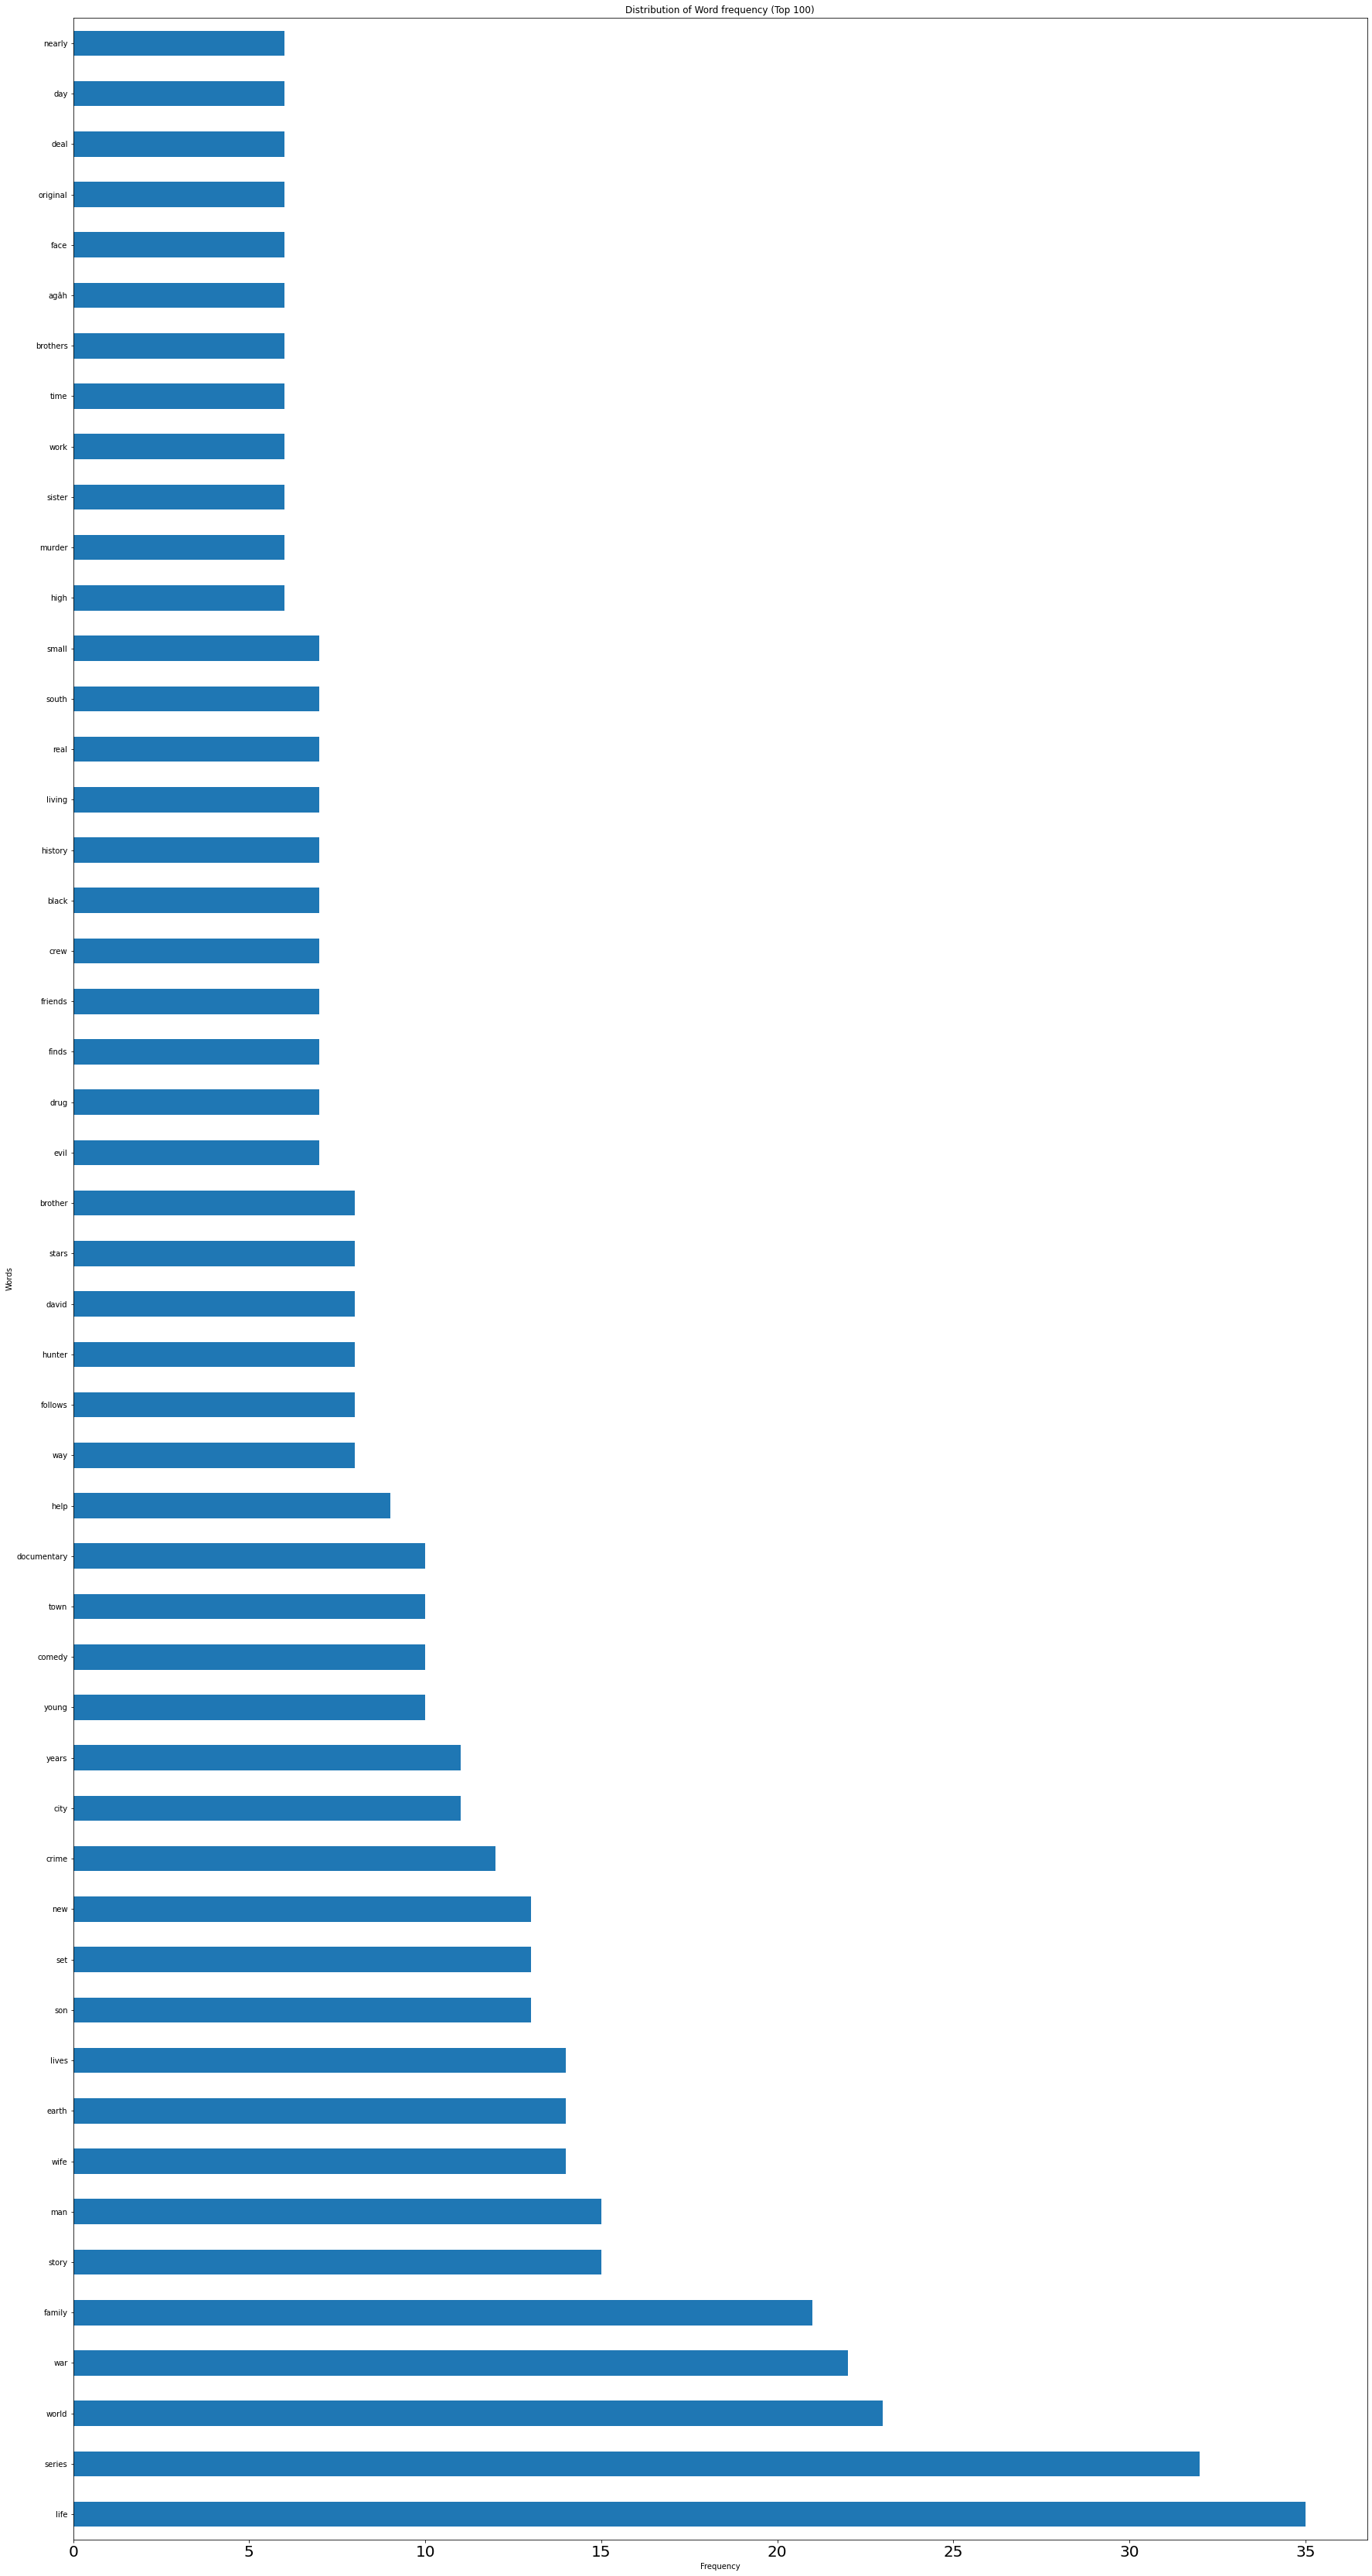

In [24]:
plt.figure(figsize=(30, 60))
word_frequency[:50].plot.barh()
plt.title("Distribution of Word frequency (Top 100)")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

TF-IDF

Count not frequent words of the top 10 serie : why the serie is original ?

In [36]:
from  sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
tfidf = TfidfVectorizer(lowercase=True, 
                         stop_words=STOP_WORDS, 
                         ngram_range=(1,1), 
                         max_features=2000)

In [38]:
# Transformer la liste des documents en matrice eparse : tableau de fréquence
csr_mat = tfidf.fit_transform(df_top_ten["Storyline"])
#csr_mat.toarray()

words = tfidf.get_feature_names()

df_tfidf = pd.DataFrame(index=df_top_ten["Storyline"], data=csr_mat.toarray(), columns=words)
df_tfidf

,acclaimed,accompanied,action,affects,africa,airborne,america,ancient,april,arctic,...,wife,wilderness,women,working,world,worldrenowned,worlds,worse,years,yeti
Storyline,,,,,,,,,,,,,,,,,,,,,
david attenborough returns in this breathtaking documentary showcasing life on planet earth,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
each minute episode features a global overview of a different biome or habitat on earth polar mountain cave desert plains fresh water seas ocean forest followed by a tenminute featurette which takes a behindthescenes look at the challenges of filming the episode,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
this is the story of e easy company th regiment of the st airborne division from their initial training starting in to the end of world war ii they parachuted behind enemy lines in the early hours of dday in support of the landings at utah beach participated in the liberation of carentan and again parachuted into action during operation market garden they also liberated a concentration camp and were the first to enter hitlers mountain retreat in berchtesgaden a fascinating tale of comradeship that is in the end a tale of ordinary men who did extraordinary things,0.000000,0.000000,0.135739,0.000000,0.000000,0.135739,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.100953,0.000000,0.000000,0.000000,0.000000,0.000000
when chemistry teacher walter white is diagnosed with stage iii cancer and given only two years to live he decides he has nothing to lose he lives with his teenage son who has cerebral palsy and his wife in new mexico determined to ensure that his family will have a secure future walt embarks on a career of drugs and crime he proves to be remarkably proficient in this new world as he begins manufacturing and selling methamphetamine with one of his former students the series tracks the impacts of a fatal diagnosis on a regular hard working man and explores how a fatal diagnosis affects his morality and transforms him into a major player of the drug trade,0.000000,0.000000,0.000000,0.126755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.126755,0.000000,0.000000,0.126755,0.094271,0.000000,0.000000,0.000000,0.126755,0.000000
in april a huge explosion erupted at the chernobyl nuclear power station in northern ukraine this series follows the stories of the men and women who tried to contain the disaster as well as those who gave their lives preventing a subsequent and worse one,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.215872,0.000000,...,0.000000,0.000000,0.215872,0.000000,0.000000,0.000000,0.000000,0.215872,0.000000,0.000000
set in baltimore this show centers around the citys innercity drug scene it starts as midlevel drug dealer dangelo barksdale beats a murder rap after a conversation with a judge det james mcnulty has been assigned to lead a joint homicide and narcotics team in order to bring down drug kingpin avon barksdale avon barksdale accompanied by his righthand man stringer bell enforcer weebey and many lieutenants including his own nephew dangelo barksdale has to deal with law enforcement informants in his own camp and competition with a local rival omar whos been robbing barksdales dealers and reselling the drugs the supervisor of the investigation lt cedric daniels has to deal with his own problems such as a corrupt bureaucracy some of his detectives beating suspects hardheaded but determined det mcnulty and a blackmailing deputy the show depicts the lives of every part of the drug food chain from junkies to dealers and from cops to politicians,0.000000,0.091882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0

In [39]:
#Affiche les mots utiles : qui ne sont pas présents dans tous les documents mais présent dans un un seul et apporte une différence
inverse_document_freq = pd.DataFrame({"idf":tfidf.idf_}, 
                                     index=tfidf.get_feature_names())
inverse_document_freq = inverse_document_freq.sort_values(by="idf", ascending=False)
inverse_document_freq

,idf
acclaimed,2.704748
operation,2.704748
plains,2.704748
participated,2.704748
parachuted,2.704748
...,...
documentary,2.011601
lives,2.011601
world,2.011601
men,2.011601


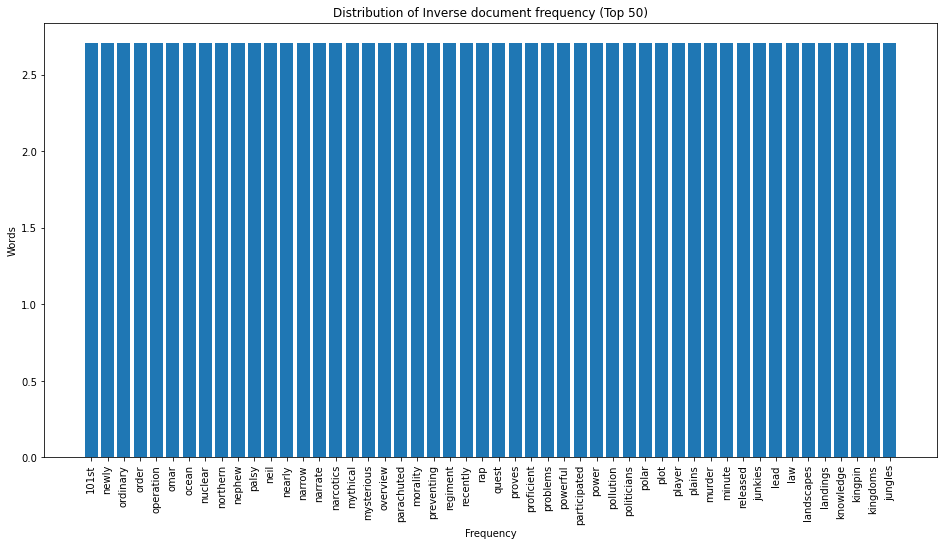

In [24]:
plt.figure(figsize=(16, 8))
plt.title("Distribution of Inverse document frequency (Top 50)")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.bar(height=inverse_document_freq[:50]['idf'], 
        x=inverse_document_freq[:50].index)
plt.xticks(rotation=90)
plt.show()